<a href="https://colab.research.google.com/github/ananyakaalindi/Data-Analysis/blob/main/SVD_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Singular Value Decomposition

import numpy as np
from scipy.linalg import svd

A=np.random.randint(1,12,12).reshape((4,3))
U,W,V_T=svd(A)
print(U)
print(W)
print(V_T)

[[-0.18816588  0.28028134 -0.0695816  -0.93871954]
 [-0.61820834 -0.35726279  0.6992751  -0.0345844 ]
 [-0.53736159 -0.45788212 -0.70783878  0.02346799]
 [-0.54189904  0.76429682 -0.07167284  0.34213857]]
[24.50118463  7.69865827  4.2921571 ]
[[-0.55369265 -0.5676021  -0.60930477]
 [ 0.5893107  -0.78405342  0.19486697]
 [-0.58833439 -0.25117341  0.76861861]]


                              PC1       PC2
mean radius              0.798469 -0.558394
mean texture             0.378346 -0.142564
mean perimeter           0.829965 -0.513800
mean area                0.806101 -0.551755
mean smoothness          0.520110  0.444392
mean compactness         0.872817  0.362680
mean concavity           0.942542  0.143660
mean concave points      0.951490 -0.083016
mean symmetry            0.503978  0.454506
mean fractal dimension   0.234772  0.875292
radius error             0.751328 -0.252033
texture error            0.063570  0.214849
perimeter error          0.770833 -0.213602
area error               0.739987 -0.363638
smoothness error         0.053005  0.488130
compactness error        0.621527  0.555669
concavity error          0.560234  0.470883
concave points error     0.669033  0.311176
symmetry error           0.155017  0.438984
fractal dimension error  0.374128  0.668791
worst radius             0.831641 -0.524987
worst texture            0.38106

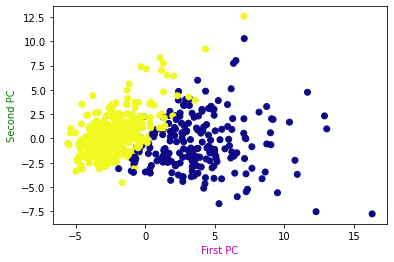

<function matplotlib.pyplot.show(*args, **kw)>

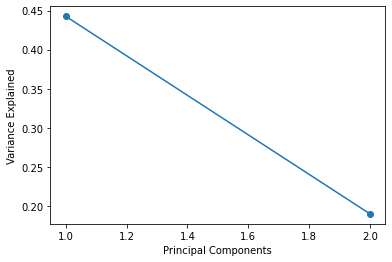

In [16]:
#Principal Component Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

#getting the dataset
cancer=load_breast_cancer()

#representing data into a structue
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

#standardizing the data

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)

#performing PCA
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

#loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=cancer.feature_names)
print(loading_matrix)

plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First PC',color='m')
plt.ylabel('Second PC',color='g')
plt.show()

#scree plot
pca_vals=np.arange(pca.n_components_)+1
plt.plot(pca_vals,pca.explained_variance_ratio_,'-o')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show